In [1]:
import pandas as pd
 
# Reading the CSV file
df = pd.read_csv("iris.csv")
 
# Printing top 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape

(150, 6)

In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
import pandas as pd

# Load the dataset
iris_df = pd.read_csv('iris.csv')

# Check for missing values
missing_values = iris_df.isnull().sum()
print(missing_values)

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
import pandas as pd

# Load the dataset
iris_df = pd.read_csv('iris.csv')

# Identify duplicate rows
duplicate_rows = iris_df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

# Drop duplicates
iris_df = iris_df.drop_duplicates()

Number of duplicate rows: 0


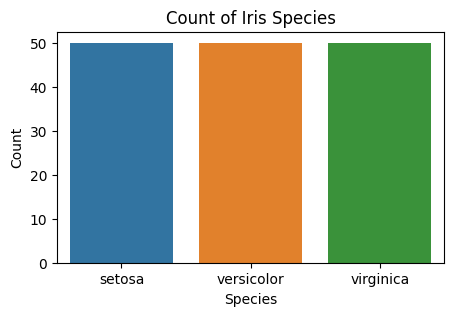

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a countplot of the 'species' column
plt.figure(figsize=(5, 3)) # Optional: Adjust figure size for better readability
sns.countplot(x="species", data=iris)
plt.title("Count of Iris Species") # Optional: Add a title to the plot
plt.xlabel("Species") # Optional: Label the x-axis
plt.ylabel("Count") # Optional: Label the y-axis
plt.show()

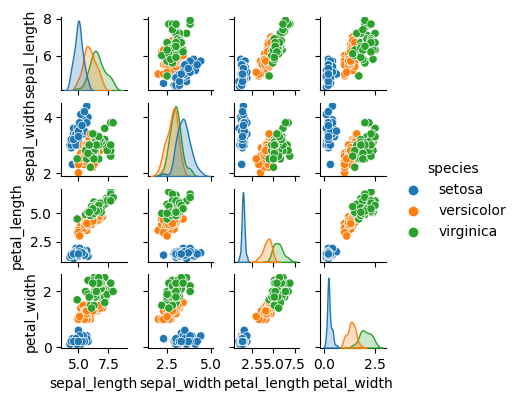

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Create a pairplot with a desired height for each subplot (e.g., 2.5 inches)
# You can also use the 'hue' parameter to color-code points by species for better visualization
sns.pairplot(iris, hue='species', height=1.0) 

# Add a title to the plot (optional)
plt.suptitle(' ',y=0.5) # y adjusts title position

# Display the plot
plt.show()

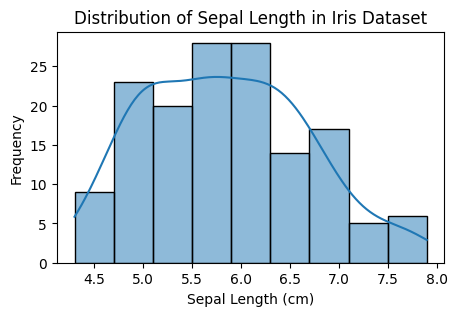

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a figure with a specific size (e.g., height=6 inches, width=8 inches)
plt.figure(figsize=(5, 3))

# Create the histogram for 'sepal_length'
sns.histplot(data=iris, x="sepal_length", kde=True) # kde=True adds a Kernel Density Estimate line

# Add title and labels for clarity
plt.title("Distribution of Sepal Length in Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Frequency")

# Display the plot
plt.show()

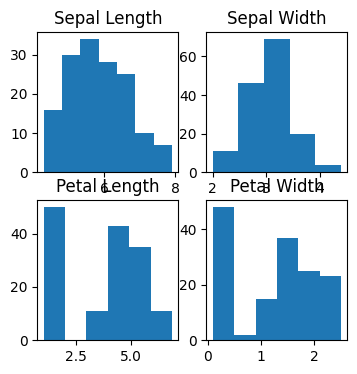

In [41]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(2, 2, figsize=(4,4))
 
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['SepalLengthCm'], bins=7)
 
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['SepalWidthCm'], bins=5);
 
axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['PetalLengthCm'], bins=6);
 
axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['PetalWidthCm'], bins=6);

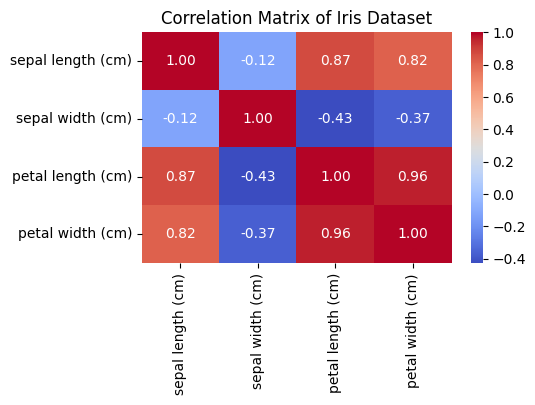

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

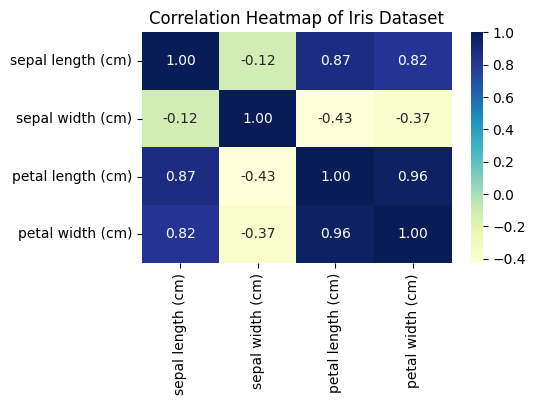

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Calculate the correlation matrix
corr_matrix = iris_df.corr()

# Create the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap of Iris Dataset")
plt.show()

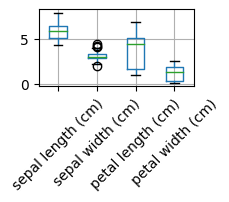

Removed 0 outliers using IQR on 'sepal length (cm)'.
Removed 1 outliers using Z-score.


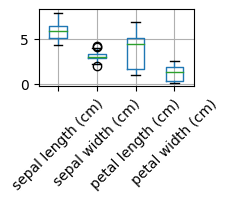

In [54]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Visualize using boxplots
plt.figure(figsize=(2, 1))
df.drop('target', axis=1).boxplot()
#plt.title('Boxplots of Iris Features')
plt.xticks(rotation=45)
plt.show()

# Example using IQR method for 'sepal length (cm)'
feature = 'sepal length (cm)'
Q1 = df[feature].quantile(0.25)
Q3 = df[feature].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_iqr = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
print(f"Removed {len(df) - len(df_iqr)} outliers using IQR on '{feature}'.")

# Example using Z-score method
z_scores = np.abs(stats.zscore(df.drop('target', axis=1)))
df_no_outliers = df[(z_scores < 3).all(axis=1)]
print(f"Removed {len(df) - len(df_no_outliers)} outliers using Z-score.")

# Visualize after outlier handling
plt.figure(figsize=(2, 1))
df_no_outliers.drop('target', axis=1).boxplot()
#plt.title('Boxplots of Iris Features after Outlier Handling')
plt.xticks(rotation=45)
plt.show()